For Ring Current, we will use energy  bins from 1 keV to 50 keV
ENERGY_BINS = (np.array([51767.680, 44428.696, 38130.120, 32724.498, 28085.268, 24103.668, 20686.558, 17753.876, 15236.896, 13076.798, 11222.936, 9631.899, 8266.406, 7094.516, 6088.722, 5225.528, 4484.742, 3848.919, 3303.284, 2834.964, 2433.055, 2088.129, 1792.096, 1538.062, 1319.977, 1132.846, 972.237]))

In [ ]:
import prepare_ml_dataset
import train_nn_model
import initialize_var
import importlib

importlib.reload(train_nn_model)
importlib.reload(prepare_ml_dataset)
importlib.reload(initialize_var)

train_nn_model.train_nn_model('51767680', 'h')

In [ ]:
import prepare_ml_dataset
import train_nn_model
import initialize_var
import importlib

importlib.reload(train_nn_model)
importlib.reload(prepare_ml_dataset)
importlib.reload(initialize_var)

energy = '51767680'
species = 'h'
forecast = "none"
dL01=True
recalc = False
number_history = 7
raw_feature_names=['symh','asyh','ae','asyd']

train_nn_model.train_nn_model(energy, species, recalc = recalc, dL01=dL01, number_history = number_history, raw_feature_names = raw_feature_names, forecast = forecast)

### The following code are from train_nn_model. Run them seperatedly to debug

In [4]:
dataset_csv, data_settings, directories = initialize_var.initialize_data_var(energy=energy, species=species, raw_feature_names = raw_feature_names, forecast = forecast, number_history = number_history, dL01=dL01)

x_train, x_valid, x_test, y_train, y_valid, y_test = prepare_ml_dataset.load_ml_dataset(energy, species, recalc = recalc, dL01=dL01, raw_feature_names = raw_feature_names,  forecast = forecast, number_history = number_history)

(array([1.3010e+03, 0.0000e+00, 2.2000e+01, 6.3300e+02, 1.0835e+04,
        1.4455e+04, 2.6002e+04, 4.1952e+04, 3.0278e+04, 8.4500e+02]),
 array([1.    , 1.8199, 2.6398, 3.4597, 4.2796, 5.0995, 5.9194, 6.7393,
        7.5593, 8.3792, 9.1991]),
 <BarContainer object of 10 artists>)

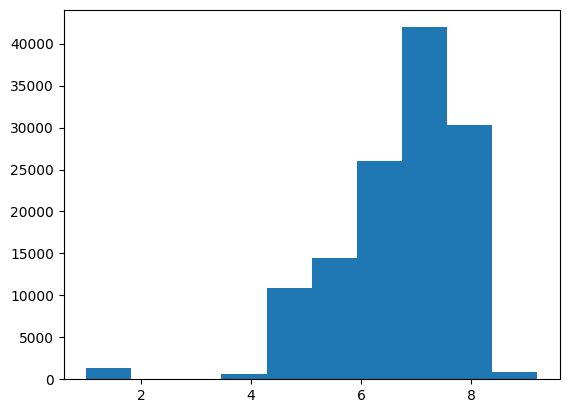

In [10]:
import matplotlib.pyplot as plt

# data_directories, dataset_csv, data_settings = initialize_var.initialize_data_var(energy=energy, species=species, raw_feature_names = raw_feature_names, forecast = forecast, number_history = number_history, dL01=dL01)




In [ ]:
# import os
# import numpy as np

# import pandas as pd

# os.environ["CUDA_VISIBLE_DEVICES"] = "-1" # This is to disable GPU
# os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"

# importlib.reload(train_nn_model)

para_name = "learning_rate"
para_set = [1.e-4, 1.5e-3, 1.e-3]

final_train_loss = np.zeros(len(para_set))
final_valid_loss = np.zeros(len(para_set))
total_history = dict()
valid_r2s = np.zeros(len(para_set))

print("start to train")

for ipara in range(len(para_set)):
    parameter = para_set[ipara]

    model, history, valid_r2 = nn_model(x_train, y_train, x_valid, y_valid, data_settings["log_y_name"], output_dir = directories["training_output_dir"] , model_fln = '', mse_fln = '', n_neurons = n_neurons, dropout_rate = dropout_rate, patience = patience, learning_rate = parameter, epochs = epochs, batch_size = batch_size, dL01= dL01, nlayer= nlayer)        
    
    total_history[str(parameter)] = history.history
    final_train_loss[ipara] = history.history['loss'][-1]
    final_valid_loss[ipara] = history.history['val_loss'][-1]
    valid_r2s[ipara] = valid_r2

print(para_set, final_valid_loss,valid_r2s)

